In [1]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Implementação de um código de conversão de cores para simular protanopia e deuteranopia 

### Frederico Curti e Gabriel Moreira

In [15]:
img = cv2.imread('./beatles.jpg')

WIDTH = 6
HEIGHT = 4
NCOLS = 2

def show_images(imgs, width=WIDTH, height=HEIGHT, ncols=NCOLS, subtitles=None):
    nrows = (len(imgs) + 1) // ncols
    subs = 0
    
    plt.figure(figsize=(ncols*width, nrows*height))
    for idx, img in enumerate(imgs):
        plt.subplot(nrows, ncols, idx+1)
        if subtitles is not None:
            plt.text(WIDTH/2,HEIGHT , subtitles[subs], bbox={'facecolor': 'white', 'pad': 10})
            subs += 1
            
        plt.imshow(img, cmap='gray', vmin=0, vmax=255)
        plt.axis('off')
    plt.show()    


def protanope(image):
    
    p = np.array([
        [0, 2.02344, - 2.52581],
        [0, 1, 0],
        [0, 0, 1]
    ])

    RGB_to_LMS = np.array([
        [17.8824, 43.5161, 4.11935],
        [3.45565, 27.1554, 3.86714],
        [0.0299566, 0.184309, 1.46709]
    ])

    RGB_to_LMS_inv = np.array([
        [0.080944, -0.130504, 0.116721],
        [-0.0102485, 0.0540194, -0.113615],
        [-0.000365294, -0.00412163, 0.693513]
    ])

    img = image.copy()
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    h, w, z = np.shape(img)
    
    for i in range(h):
        for j in range(w):
            
            # computar relative photometric quantities
            rpq = (img[i][j]/255)**2.2
            
            #scaling
            srpq = 0.992052 * rpq + 0.003974
            
            # lms
            lms = np.dot(RGB_to_LMS, srpq)
            
            # multiply by p
            multiplied_by_p = np.dot(p, lms)
            
            # to get rgb
            rgb = np.dot(RGB_to_LMS_inv, multiplied_by_p)
            
            # inverse of the step 1
            img[i][j] = 255 * rgb**(1/2.2)
            
    return img

def deuteranope(image):
    RGB_to_LMS = np.array([
        [17.8824, 43.5161, 4.11935],
        [3.45565, 27.1554, 3.86714],
        [0.0299566, 0.184309, 1.46709]
    ])

    RGB_to_LMS_inv = np.array([
        [0.080944, -0.130504, 0.116721],
        [-0.0102485, 0.0540194, -0.113615],
        [-0.000365294, -0.00412163, 0.693513]
    ])
    
    d = np.array([
        [1, 0, 0],
        [0.494207, 0, 1.24827],
        [0, 0, 1]
    ])
    
    img = image.copy()
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    h, w, z = np.shape(img)
    
    for i in range(h):
        for j in range(w):
            # computar relative photometric quantities
            rpq = (img[i][j]/255)**2.2
            
            #scaling
            srpq = 0.957237 * rpq + 0.0213814
            
            # lms
            lms = np.dot(RGB_to_LMS, srpq)
            
            # multiply by p
            multiplied_by_p = np.dot(d, lms)
            
            # to get rgb
            rgb = np.dot(RGB_to_LMS_inv, multiplied_by_p)
            
            # inverse of the step 1
            img[i][j] = 255 * rgb**(1/2.2)
           
            
    return img

## Abaixo estão as imagens para comparação antes e após a aplicação do tratamento

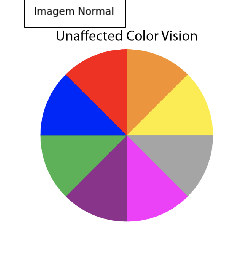

In [17]:
#ORIGINAL
ss_o = cv2.cvtColor(cv2.imread('./normal.png'), cv2.COLOR_BGR2RGB)
show_images([ss_o], subtitles=["Imagem Normal"])

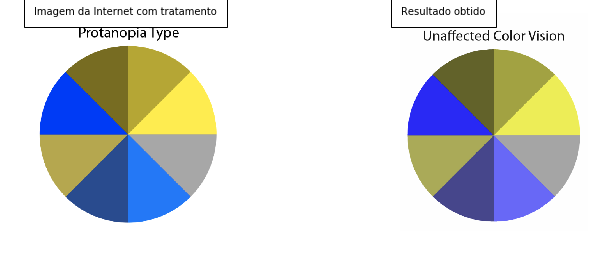

In [19]:
#PROTANOPIA
ss_1 = cv2.cvtColor(cv2.imread('./protanopia.png'), cv2.COLOR_BGR2RGB)
show_images([ss_1, protanope(ss_o)], subtitles=['Imagem da Internet com tratamento', 'Resultado obtido'])

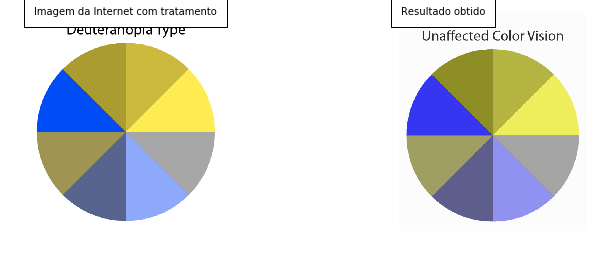

In [20]:
#Deuteranopia
ss_1 = cv2.cvtColor(cv2.imread('./deuteranopia.png'), cv2.COLOR_BGR2RGB)
show_images([ss_1, deuteranope(ss_o)], subtitles=['Imagem da Internet com tratamento', 'Resultado obtido'])

## Outros exemplos

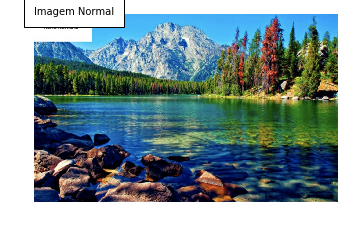

In [25]:
#ORIGINAL
ss_o = cv2.cvtColor(cv2.imread('./normal2.png'), cv2.COLOR_BGR2RGB)
show_images([ss_o], subtitles=["Imagem Normal"])

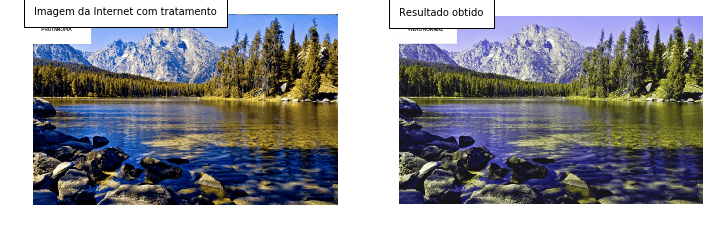

In [26]:
#PROTANOPIA
ss_1 = cv2.cvtColor(cv2.imread('./protanopia2.png'), cv2.COLOR_BGR2RGB)
show_images([ss_1, protanope(ss_o)], subtitles=['Imagem da Internet com tratamento', 'Resultado obtido'])

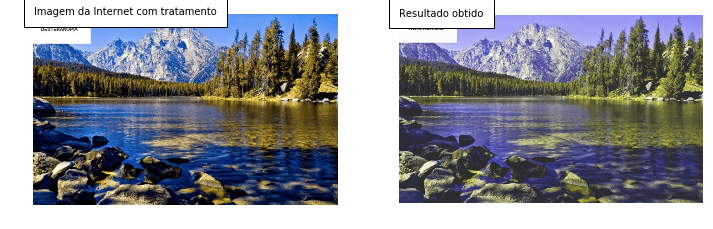

In [27]:
#Deuteranopia
ss_1 = cv2.cvtColor(cv2.imread('./deuteranopia2.png'), cv2.COLOR_BGR2RGB)
show_images([ss_1, deuteranope(ss_o)], subtitles=['Imagem da Internet com tratamento', 'Resultado obtido'])

<h1> Questões - pesquisa </h1>

## Como saber se o simulador realmente apresenta a experiência sensorial de uma pessoa com daltonismo? Como validar esses resultados?

A primeira opção para validação foi comparar os resultados obtidos com imagens disponíveis na internet que também simulam o daltonismo, na qual obtemos resultados satisfatórios. 

Outra forma de validar se o simulador realmente funciona seria implementar algum tipo de teste que involva a identificação de cores usando pessoas com daltonismo e pessoas sem daltonismo. Para as pessoas com daltonismo, exibiríamos a imagem normal, para as pessoas com a visão normal, exibiriamos uma imagem que passou pelo filtro de daltonismo que criamos. Se o resultado do teste for parecido para ambos grupos, poderiamos considerar que o simulador realmente apresenta a experiência sensorial de uma pessoa com daltonismo

## Quais as aplicações desse trabalho? Como você usaria esta técnica para melhorar o design de um produto?

Uma aplicação possível é o uso desse trabalho para simular a visão de um possível usuário daltônico, de forma que seja possível adaptar uma interface para que seu entendimento não seja prejudicado por esse usuário ou que seja disponibilizada uma maneira de ajustar as cores para daltônicos. Este último já pode ser encontrado em diversos jogos, nos quais as cores da HUD (Heads up display) podem ser ajustadas, mas no dia-a-dia encontra poucas aplicações. Isso é especialmente importante em situações de risco, onde uma placa de perigo, por exemplo, pode ser mal-intepretada e causar um acidente
<br>

<img src='./tk.jpg'>

<p style="text-align: center;"> Exemplo do jogo League of Legends, no qual a barra de vida muda de cor para ser mais fácilmente visualizada por daltônicos </p>
